In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#inline matplotlib

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
fname = 'Warehouse-1_Power Meter_Warehouse-1 Meter (Door 1)_2021-09-01-2021-09-13.csv'
fname = 'Warehouse-1_Power Meter_Warehouse-1 Meter (Door 1)_2021-09-14_0000 to 2359.csv'
fname = 'Warehouse-2_Power Meter_Warehouse-2 Meter (Door 3)_2021-09-01-2021-09-13.csv'
fname = 'Warehouse-1_Power Meter_Warehouse-1 Meter (Door 1)_2021-09-13_0000 to 2359.csv'
fname = 'Warehouse-2_Power Meter_Warehouse-2 Meter (Door 3)_2021-09-13_0000 to 2359.csv'
fname = 'Warehouse-2_Power Meter_Warehouse-2 Meter (Door 4)_2021-09-27_0000 to 2359.csv'
fname = 'Warehouse-2_Power Meter_Warehouse-2 Meter (Door 4)_2021-09-26_0000 to 2359.csv'
fname = 'Warehouse-2_Power Meter_Warehouse-2 Meter (Door 4)_2021-09-25_0000 to 2359.csv'
#fname = 'Warehouse-2_Power Meter_Warehouse-2 Meter (Door 3)_2021-10-07_0000 to 2359.csv'
#fname = 'Warehouse-2_Power Meter_Warehouse-2 Meter (Door 3)_2021-10-06_0000 to 2359.csv'
#fname = 'Warehouse-2_Power Meter_Warehouse-2 Meter (Door 3)_2021-10-09_0000 to 2359.csv'
#fname = 'Warehouse-4_Power Meter_Warehouse-4 Meter (Door 7)_2021-10-05_0000 to 2359.csv'
fname = 'data/Warehouse-1_Power Meter_Warehouse-1 Meter (Door 1)_2021-09-13_0000 to 2359.csv'
a=pd.read_csv(fname,header=0,parse_dates=[3])
#a=pd.read_csv(fname,header=0,nrows=1000000,parse_dates=[3])
#a=pd.read_csv(fname,parse_dates=[3],header=0,skiprows=20000000, names=['Device Name','Device ID','Measurement Point ID','Date Time','Reading'])
#a=pd.read_csv(fname,nrows=10000,parse_dates=[3],date_parser=lambda col: pd.to_datetime(col, utc=True))
print(a.dtypes)

fname = 'Warehouse-1_Vibration Sensor_Warehouse-1 Vibration Sensor (Door 1)_2021-09-01-2021-09-13.csv'
fname = 'data/Warehouse-1_Vibration Sensor_Warehouse-1 Vibration Sensor (Door 1)_2021-09-13_0000 to 2359.csv'
#fname = 'Warehouse-2_Vibration Sensor_Warehouse-2 Vibration Sensor (Door 3)_2021-09-01-2021-09-13.csv'
#fname = 'Warehouse-2_Vibration Sensor_Warehouse-2 Vibration Sensor (Door 4)_2021-09-25_0000 to 2359.csv'
#fname = 'Warehouse-2_Vibration Sensor_Warehouse-2 Vibration Sensor (Door 3)_2021-09-13_0000 to 2359.csv'
#b=pd.read_csv(fname,parse_dates=[3],skiprows=1000000,names=['Device Name','Device ID','Measurement Point ID','Date Time','Reading'])
b=pd.read_csv(fname,parse_dates=[3])

fname = 'Warehouse-1_Temperature Sensor_Warehouse-1 Temperature Sensor (Door 1)_2021-09-01-2021-09-13.csv'
fname = 'data/Warehouse-1_Temperature Sensor_Warehouse-1 Temperature Sensor (Door 1)_2021-09-13_0000 to 2359.csv'
c=pd.read_csv(fname,parse_dates=[3])

a

Device Name                                            object
Device ID                                              object
Measurement Point ID                                   object
Date Time               datetime64[ns, pytz.FixedOffset(480)]
Reading                                               float64
dtype: object


,Device Name,Device ID,Measurement Point ID,Date Time,Reading
0,Warehouse-1 Meter (Door 1),HtWw2UWs,Ep_imp,2021-09-13 00:00:00.177000+08:00,4.7
1,Warehouse-1 Meter (Door 1),HtWw2UWs,Ep_total,2021-09-13 00:00:00.177000+08:00,4.7
2,Warehouse-1 Meter (Door 1),HtWw2UWs,Fourth_Circuit_Current_Measured,2021-09-13 00:00:00.329000+08:00,0.0
3,Warehouse-1 Meter (Door 1),HtWw2UWs,raw_current_line_avg,2021-09-13 00:00:00.329000+08:00,0.0
4,Warehouse-1 Meter (Door 1),HtWw2UWs,raw_current_line_l1,2021-09-13 00:00:00.329000+08:00,0.0
...,...,...,...,...,...
2937595,Warehouse-1 Meter (Door 1),HtWw2UWs,raw_voltage_phase_v3,2021-09-13 23:59:59.423000+08:00,0.0
2937596,Warehouse-1 Meter (Door 1),HtWw2UWs,raw_power_factor_phase_pfa,2021-09-13 23:59:59.423000+08:00,1.0
2937597,Warehouse-1 Meter (Door 1),HtWw2UWs,raw_power_factor_phase_pfb,2021-09-13 23:59:59.423000+08:00,1.0
2937598,Warehouse-1 Meter (Door 1),HtWw2UWs,raw_power_factor_phase_pfc,2021-09-13 23:59:59.423000+08:00,1.0


In [69]:
# detect door events recursively
#    df: dataframe containing 'DateTime', 'Reading', assuming 'Date Time' sampled at roughly 1 second
# return: a list of event time pair (window start& end time): [event1_start, event1_end, event2_start, event2_end, ... ]
def detect_door_event_tw(df):
    c = 'raw_current_line_avg'
    sep_thresh = 60. # time window length for event separation, according to client, 60sec by default
    n=len(df)
    ids = np.arange(n)
    idZero = ids[df[c].values<=0]
    if len(idZero)==0:
        return []
    
    id0 = idZero[0]
    
    if len(df[df[c]>0])<10:
        return []
    
    # find first silent window with length > sep_thresh
    for i1 in idZero:
        i2 = int(min(n,i1+sep_thresh))
        if np.max(df[c].values[i1:i2])==0:
            id0 = i1
            break

    dfc=df.iloc[id0:,:]
    
    n=len(dfc)
    t0 = dfc['time'].values[0]
    ts = (dfc['time'].values - t0).astype(float)/1e9
    v = dfc[c].values
    ids = np.arange(n)
    
    idx = ids[v>0]
    tgp = ts[v>0]
    if len(idx)==0:
        return []
    
    idxOri = [idx[0]]
    idxdf = np.diff(idx)
    tsdf = np.diff(tgp)

    idxSep = np.arange(len(tsdf))[tsdf>sep_thresh]
    if len(idxSep)>0:
        idxOri = np.append(idxOri,idx[:-1][idxSep] )
    
    if ts[-1] - ts[idx[-1]] > sep_thresh:
        idxOri = np.append(idxOri, idx[-1])
    
    # shift by first zero index 
    if id0>0:
        idxOri += id0
    
    if len(idxOri)>2:
        return np.append(idxOri[:2], idxOri[1]+1+detect_door_event_tw(df.iloc[(idxOri[1]+1):,:]))
    else:
        return idxOri
    
    
# detect a single door event by returning key parameters
#    df: dataframe containing 'DateTime', 'Reading'
# return: a list of event parametes: [start, end, duration, max1, max2, maxV, nZero, nDrop, nDrop2Zero ]
def detect_event_type(df):
    times = df['time'].values
    val = df['raw_current_line_avg'].values
    val_roll = df['raw_current_line_avg'].rolling(5,min_periods=2).max()
    n = len(df)
    
    tw1_dur = 10. # 10 seconds for time window 1 (beginning window)
    tw1_maxAmp = 5.5 # amper
    tw2_dur = 8. # 10 seconds for time window 2 (ending window)
    mid_minAmp = 0.5 # minimum current in middle way (to be used for zero counting)
    min_dropAmp = -5. # minimum drop of current 
    
    
    t0 = times[0]
    ts = (times - t0).astype(float)/1e9
    tdur = ts[-1]
    w1 = min(tdur/2, tw1_dur)
    w2 = min(tdur/2, tw2_dur)
    print(tdur,tw1_dur)
    idzero = np.arange(n)[val<=mid_minAmp]
    #print('drop:',iddrop, set(iddrop) & set(idzero))
    nZero = len(idzero)
    
    #calc nDrop
    if 0: # obsolete
        vdiff = np.diff(val)        
        iddrop = np.arange(n-1)[vdiff<min_dropAmp] + 1
        nDrop = len(iddrop)
    else: # new method
        vdiff =  val[:-1] - val_roll.values[1:]
        iddrop = np.arange(n-1)[vdiff<min_dropAmp] + 1
        iddrop_diff = np.diff(iddrop)
        
        if len(iddrop)<=1:            
            nDrop = len(iddrop)
        else:
            nDrop = len(iddrop_diff[iddrop_diff>1]) + 1    

    nDrop2Zero = len(set(iddrop) & set(idzero))
    
    val_w1 = val[ts<w1]
    val_w2 = val[ts>(tdur-w2)]
    max1 = np.max(val_w1)
    max2 = np.max(val_w2) 
    maxV = np.max(val)
    
    if 0:
        tag = 'open' if max1>max2 else 'close'
        if nmin>5:
            tag = 'n/a'
        
    return times[0], times[-1], tdur, max1, max2, maxV, nZero, nDrop, nDrop2Zero #start, end, duration, max1, max2, nZero, nDrop, nDrop2Zero 


# detect all door events by meeting minimum duration criteria
#    df: dataframe containing 'DateTime', 'Reading'
#    min_dur: minimum duration for a door event(sec)
# return: list of events composed by return of detect_event_type()
def detect_events(df, min_dur=30):
    evlist = []
    idxsel = detect_door_event_tw(df)
    print('selected time-window pairs:',idxsel)
    j=1
    for i in range(int(len(idxsel)/2)):
        id1 = int(idxsel[i*2])
        id2 = int(idxsel[i*2+1])
        idrange=range(id1,id2+1) #index range for a located door event
        
        ev = detect_event_type(df.iloc[idrange,:])
        
        if len(ev)==0: continue
        if ev[2] > min_dur:
            evlist.append(ev)
        print('event '+str(j)+':',ev)
        j+=1
        
    return evlist


def plot_sensor(df,datestr,meas,door,hrs=[18,20,21,22],start_min=0,tw=60):
    #z=df[ (df['Measurement Point ID']==meas) & (df['Device Name']==door)]
    z=df
    print('df ',df.dtypes)
    n = len(hrs)
    fig=plt.figure(figsize=(12,3*n),dpi=300)    
    axes = fig.subplots(n,1)
    for i,h in enumerate(hrs):
        if n>1: 
            ax = axes[i] 
        else:
            ax = axes
        #d0 = pd.date_range(datestr+'/2021 %02d:00'%h, periods=2, freq='59T')
        d0 = pd.date_range(datestr+'/2021 %02d:'%h+'%02d'%start_min, periods=2, freq='%02dT'%tw)
        d = d0.tz_localize('Asia/Singapore')
        d = d.tz_localize(None)
        #d = pd.to_datetime(d)
        #z['time'] = pd.to_datetime(z['time'])
        
        haha = z.reset_index(drop = True)

        hehe = haha[['time', 'raw_current_line_avg']]
        hehe = hehe[:-1]

        #dfc = z[ (z['time']>=d[0]) & (z['time']<= d[1])]
        dfc = hehe[(hehe['time']>=d[0]) & (hehe['time']<= d[1])]
        print('dfc is',dfc)
        ax.plot(dfc['time'],dfc['raw_current_line_avg'],'-o',linewidth=0.5)
        #ax.plot(dfc['Date Time'],dfc['Reading'].rolling(5,min_periods=2).max(),'-xr')
        ax.grid(axis='y',linestyle='--')
        if i==n-1:
            ax.set_title(meas)
        
        if meas.find('current')<0: continue
            
        events = detect_events(dfc)
        
        if 1:
            brdc = [0.5,0.5,0.5]
            for ev in events:           
                maxAmp = ev[5]
                y_ann = np.abs(maxAmp)/20.
                ax.plot([ev[0],ev[1]], [-y_ann,-y_ann],'-^r' )
                
                ax.plot([ev[0],ev[0]], [0,maxAmp],'--',color=brdc,linewidth=1 )
                ax.plot([ev[1],ev[1]], [0,maxAmp],'--',color=brdc,linewidth=1 )
                ax.plot([ev[0],ev[1]], [maxAmp,maxAmp],'-g',color=brdc,linewidth=3,alpha=0.5)                
                #ax.plot([ev[0],ev[1]], [ev[4],ev[4]],'-b',linewidth=3,alpha=0.5)
                ax.text(ev[0],-y_ann*2, str(int(ev[2]))+'s,%.1f,'%maxAmp+','.join([str(ev[-3]),str(ev[-2]),str(ev[-1])]))
        

        
    figname='_'.join([datestr.replace('/','-'),meas,door])
    plt.savefig(figname,dpi=300)

    
    

In [70]:
import collections

#model_input: np.array[ dict1, dict2, ..., dictN]
def detect_api(model_input):
    n = len(model_input)
    dflist=[]
    for i in range(n):
        keys = list(model_input[i].keys())
        colID = 0 if keys[1]=='time' else 1
        timeID = 0 if keys[0]=='time' else 1
        df = pd.DataFrame(data=model_input[i])
        df.index=df['time']
        df = df[keys[colID]].resample('1S').first()
        df['time'] = df.index
        #print('resample',i,df.dtypes)
        dflist.append(df)
            
    dfmerge = dflist[0]
    if n>1:
        for i in range(1,n):
            dfmerge = pd.merge(dfmerge,dflist[i],how='left',on='time')
    dfmerge=dfmerge.fillna(method='backfill')
    return dfmerge

inputs=[]
def prepdict(df,meas,door):
    p = df[(df['Device Name']==door)&(df['Measurement Point ID']==meas)][['Date Time','Reading']]
    return collections.OrderedDict({'time':p['Date Time'].values, meas:p['Reading'].values})

inputs.append(prepdict(a,'raw_current_line_avg','Warehouse-1 Meter (Door 1)'))
inputs.append(prepdict(b,'raw_fatigue_vrms','Warehouse-1 Vibration Sensor (Door 1)'))
inputs.append(prepdict(b,'raw_impact_apeak','Warehouse-1 Vibration Sensor (Door 1)'))
inputs.append(prepdict(b,'raw_crest','Warehouse-1 Vibration Sensor (Door 1)'))
inputs.append(prepdict(c,'raw_tmps_temperature','Warehouse-1 Temperature Sensor (Door 1)'))

dfa = detect_api(np.array(inputs))
dfa['time']=dfa.index
print(dfa.tail(10))

                                                  raw_current_line_avg  \
time                                                                     
2021-09-13 15:59:51                                                  0   
2021-09-13 15:59:52                                                  0   
2021-09-13 15:59:53                                                  0   
2021-09-13 15:59:54                                                  0   
2021-09-13 15:59:55                                                  0   
2021-09-13 15:59:56                                                  0   
2021-09-13 15:59:57                                                  0   
2021-09-13 15:59:58                                                  0   
2021-09-13 15:59:59                                                  0   
time                 DatetimeIndex(['2021-09-12 16:00:00', '2021-09...   

                                                      raw_fatigue_vrms  \
time                                 

df  raw_current_line_avg    object
raw_fatigue_vrms        object
raw_impact_apeak        object
raw_crest               object
raw_tmps_temperature    object
time                    object
dtype: object
dfc is                       time raw_current_line_avg
75600  2021-09-13 13:00:00                    0
75601  2021-09-13 13:00:01                    0
75602  2021-09-13 13:00:02                    0
75603  2021-09-13 13:00:03                    0
75604  2021-09-13 13:00:04                    0
...                    ...                  ...
79196  2021-09-13 13:59:56                    0
79197  2021-09-13 13:59:57                    0
79198  2021-09-13 13:59:58                    0
79199  2021-09-13 13:59:59                    0
79200  2021-09-13 14:00:00                    0

[3601 rows x 2 columns]
selected time-window pairs: []


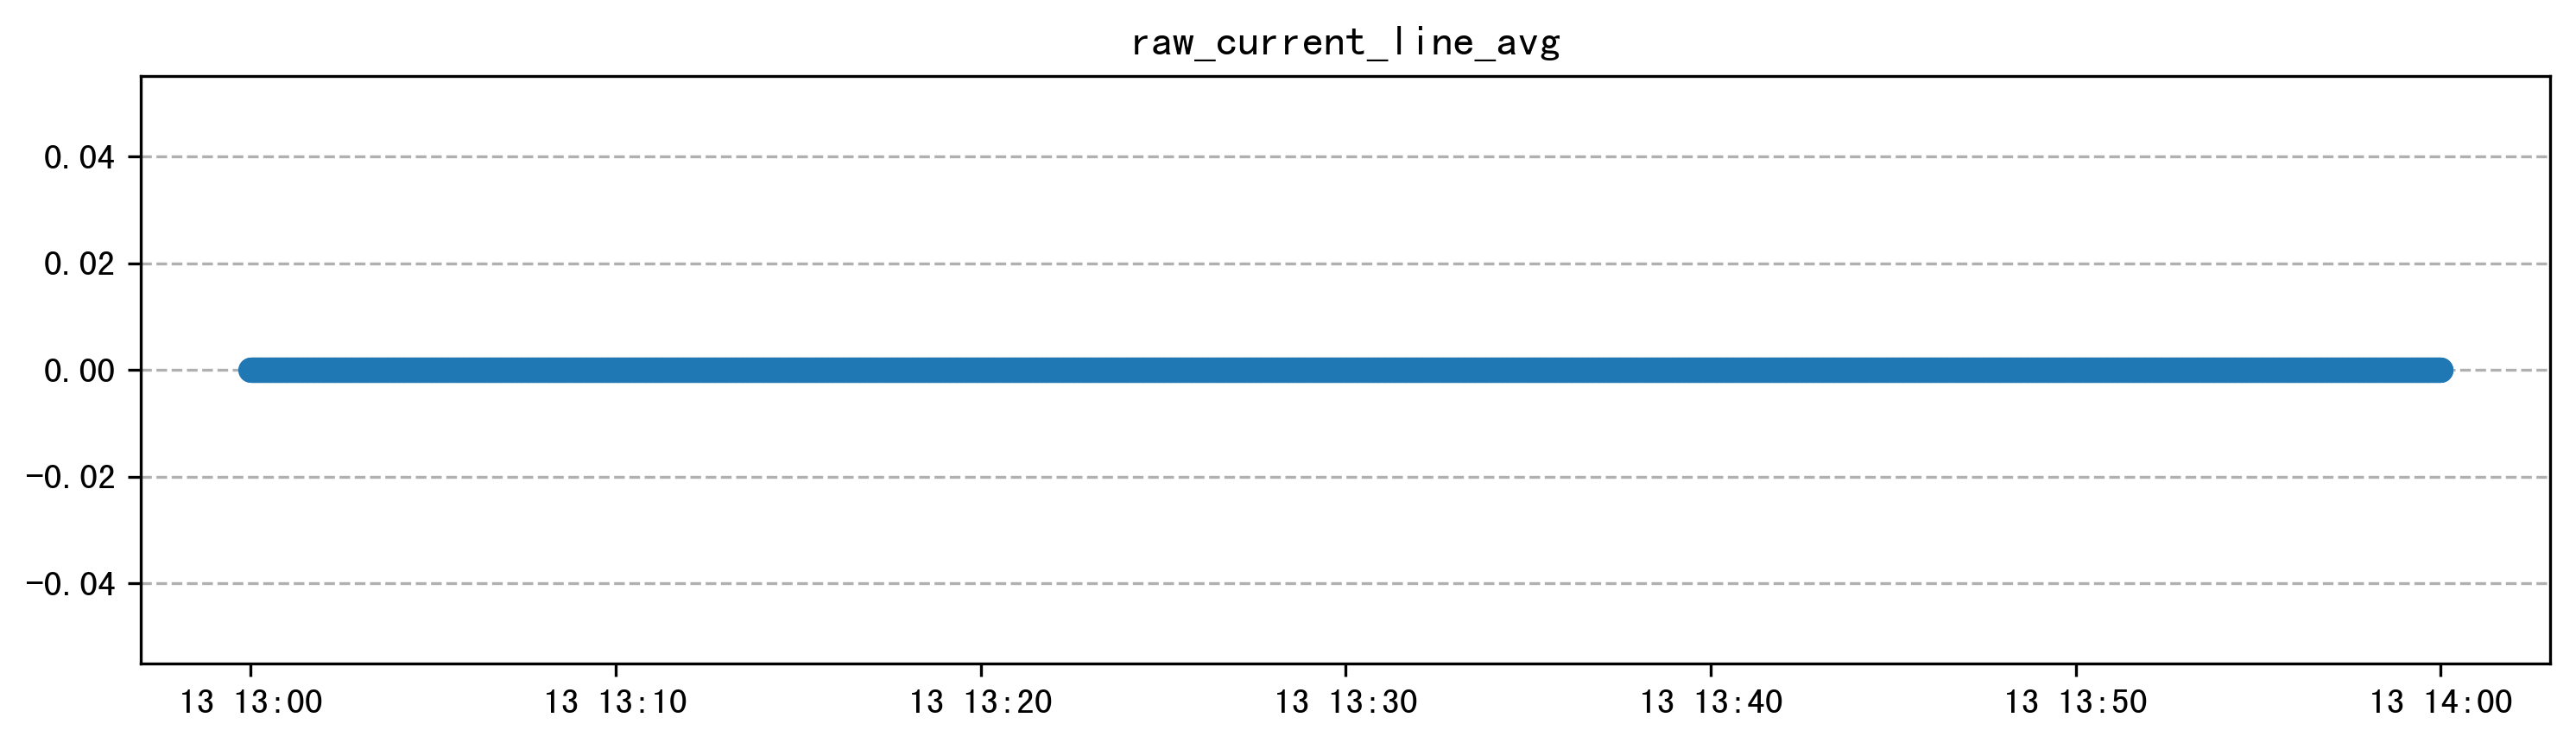

In [71]:
#plot_sensor(a,'9/12','raw_current_line_avg','Warehouse-1 Meter (Door 1)',[6,19])
#plot_sensor(a,'9/11','raw_current_line_avg','Warehouse-1 Meter (Door 1)',[6,19])
#plot_sensor(a,'9/10','raw_current_line_avg','Warehouse-1 Meter (Door 1)',[6,19])
#plot_sensor(a,'9/13','raw_current_line_avg','Warehouse-1 Meter (Door 1)',[9])
#plot_sensor(a,'9/14','raw_current_line_avg','Warehouse-1 Meter (Door 1)',range(1,12))
#plot_sensor(a,'9/13','raw_current_line_avg','Warehouse-2 Meter (Door 3)',[8])
#plot_sensor(dfa,'9/25','raw_current_line_avg','Warehouse-2 Meter (Door 4)',range(13,14))
plot_sensor(dfa,'9/13','raw_current_line_avg','Warehouse-2 Meter (Door 4)',range(13,14))
#9/12, 6, 19; 9/11, 6, 19; 9/10, 6, 19; 9/9, 5, 19; 9/8, 6, 18; 

#plot_sensor(a,'10/9','raw_current_line_avg','Warehouse-2 Meter (Door 3)',range(18,20))
#plot_sensor(a,'10/5','raw_current_line_avg','Warehouse-4 Meter (Door 7)',range(20,22))
if 0:
    plot_sensor(a,'9/1','raw_current_line_l1','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_current_line_l2','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_current_line_l3','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_current_line_avg','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_current_line_sum','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_voltage_line_v12','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_voltage_line_v23','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_voltage_line_v31','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_voltage_phase_v1','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_voltage_phase_v2','Warehouse-1 Meter (Door 1)')
    plot_sensor(a,'9/1','raw_voltage_phase_v3','Warehouse-1 Meter (Door 1)')

In [ ]:
import mlflow.pyfunc
# Define the model class
class AddN(mlflow.pyfunc.PythonModel):

    def __init__(self):
        self.min_dur = 30
#         self.meas = meas
#         self.door = door
#         self.datestr = datestr

    ################################# THIS IS THE DATA PREPROCESSING PART OF JASON ################################

    def detect_api(model_input):
    n = len(model_input)
    dflist=[]
    for i in range(n):
        keys = list(model_input[i].keys())
        colID = 0 if keys[1]=='time' else 1
        timeID = 0 if keys[0]=='time' else 1
        df = pd.DataFrame(data=model_input[i])
        df.index=df['time']
        df = df[keys[colID]].resample('1S').first()
        df['time'] = df.index
        #print('resample',i,df.dtypes)
        dflist.append(df)
            
    dfmerge = dflist[0]
    if n>1:
        for i in range(1,n):
            dfmerge = pd.merge(dfmerge,dflist[i],how='left',on='time')
    dfmerge=dfmerge.fillna(method='backfill')
    return dfmerge

############################################################################################
        
    def data_preprocess(self, model_input):
        ####pd.DataFrame(d.items(), columns=['Electric current', 'Voltage'])
        data = pd.DataFrame(model_input,columns=['Device Name','Measurement Point ID','Date Time','Reading'])
        data['Reading'] = [float(x) for x in data['Reading'].values]
        
#         z=data[ (data['Measurement Point ID']==meas) & (data['Device Name']==door)]
        data['Date Time'] = [str(i)[:-6] for i in data['Date Time']]
        data['Date Time'] = data['Date Time'].apply(pd.to_datetime)
#         d0 = pd.date_range(datestr+'/2021 00:00:00', periods=2, freq=str(60*24)+'T')
#         d = d0.tz_localize('Asia/Singapore')
#         dfc = z[ (z['Date Time']>=d0[0]) & (z['Date Time']<=d0[1])]
#         dfc['Date Time'] = [str(i)[:-6] for i in dfc['Date Time']]
#         dfc['Date Time'] = dfc['Date Time'].apply(pd.to_datetime)
        return data


####################################### THIS IS JASON detect_door_event_tw ####################################################

    def detect_door_event_tw(df):
    c = 'raw_current_line_avg'
    sep_thresh = 60. # time window length for event separation, according to client, 60sec by default
    n=len(df)
    ids = np.arange(n)
    idZero = ids[df[c].values<=0]
    if len(idZero)==0:
        return []
    
    id0 = idZero[0]
    
    if len(df[df[c]>0])<10:
        return []
    
    # find first silent window with length > sep_thresh
    for i1 in idZero:
        i2 = int(min(n,i1+sep_thresh))
        if np.max(df[c].values[i1:i2])==0:
            id0 = i1
            break

    dfc=df.iloc[id0:,:]
    
    n=len(dfc)
    t0 = dfc['time'].values[0]
    ts = (dfc['time'].values - t0).astype(float)/1e9
    v = dfc[c].values
    ids = np.arange(n)
    
    idx = ids[v>0]
    tgp = ts[v>0]
    if len(idx)==0:
        return []
    
    idxOri = [idx[0]]
    idxdf = np.diff(idx)
    tsdf = np.diff(tgp)

    idxSep = np.arange(len(tsdf))[tsdf>sep_thresh]
    if len(idxSep)>0:
        idxOri = np.append(idxOri,idx[:-1][idxSep] )
    
    if ts[-1] - ts[idx[-1]] > sep_thresh:
        idxOri = np.append(idxOri, idx[-1])
    
    # shift by first zero index 
    if id0>0:
        idxOri += id0
    
    if len(idxOri)>2:
        return np.append(idxOri[:2], idxOri[1]+1+detect_door_event_tw(df.iloc[(idxOri[1]+1):,:]))
    else:
        return idxOri
    
    def detect_door_event_tw(self, model_input):
        df = self.data_preprocess(model_input)
        sep_thresh = 60. # time window length for event separation, according to client, 60sec by default
        n=len(df)
        ids = np.arange(n)
        idZero = ids[df['Reading'].values<=0]
        id0 = idZero[0]
        
        if len(df[df['Reading']>0])<10:
            return []

        # find first silent window with length > sep_thresh
        for i1 in idZero:
            i2 = int(min(n,i1+sep_thresh))
            if np.max(df['Reading'].values[i1:i2])==0:
                id0 = i1
                break

        dfc=df.iloc[id0:,:]

        n=len(dfc)
        t0 = dfc['Date Time'].values[0]
        ts = (dfc['Date Time'].values - t0).astype(float)/1e9
        v = dfc['Reading'].values
        ids = np.arange(n)

        idx = ids[v>0]
        tgp = ts[v>0]
        if len(idx)==0:
            return []

        idxOri = [idx[0]]
        idxdf = np.diff(idx)
        tsdf = np.diff(tgp)

        idxSep = np.arange(len(tsdf))[tsdf>sep_thresh]
        if len(idxSep)>0:
            idxOri = np.append(idxOri,idx[:-1][idxSep] )

        if ts[-1] - ts[idx[-1]] > sep_thresh:
            idxOri = np.append(idxOri, idx[-1])

        # shift by first zero index 
        if id0>0:
            idxOri += id0

        if len(idxOri)>2:
            return np.append(idxOri[:2], idxOri[1]+1+self.detect_door_event_tw(df.iloc[(idxOri[1]+1):,:]))
        else:
            return idxOri
    ################################################# THIS IS JASON DETECT_EVENT_TYPE ##############################
    def detect_event_type(df):
    times = df['time'].values
    val = df['raw_current_line_avg'].values
    val_roll = df['raw_current_line_avg'].rolling(5,min_periods=2).max()
    n = len(df)
    
    tw1_dur = 10. # 10 seconds for time window 1 (beginning window)
    tw1_maxAmp = 5.5 # amper
    tw2_dur = 8. # 10 seconds for time window 2 (ending window)
    mid_minAmp = 0.5 # minimum current in middle way (to be used for zero counting)
    min_dropAmp = -5. # minimum drop of current 
    
    
    t0 = times[0]
    ts = (times - t0).astype(float)/1e9
    tdur = ts[-1]
    w1 = min(tdur/2, tw1_dur)
    w2 = min(tdur/2, tw2_dur)
    print(tdur,tw1_dur)
    idzero = np.arange(n)[val<=mid_minAmp]
    #print('drop:',iddrop, set(iddrop) & set(idzero))
    nZero = len(idzero)
    
    #calc nDrop
    if 0: # obsolete
        vdiff = np.diff(val)        
        iddrop = np.arange(n-1)[vdiff<min_dropAmp] + 1
        nDrop = len(iddrop)
    else: # new method
        vdiff =  val[:-1] - val_roll.values[1:]
        iddrop = np.arange(n-1)[vdiff<min_dropAmp] + 1
        iddrop_diff = np.diff(iddrop)
        
        if len(iddrop)<=1:            
            nDrop = len(iddrop)
        else:
            nDrop = len(iddrop_diff[iddrop_diff>1]) + 1    

    nDrop2Zero = len(set(iddrop) & set(idzero))
    
    val_w1 = val[ts<w1]
    val_w2 = val[ts>(tdur-w2)]
    max1 = np.max(val_w1)
    max2 = np.max(val_w2) 
    maxV = np.max(val)
    
    if 0:
        tag = 'open' if max1>max2 else 'close'
        if nmin>5:
            tag = 'n/a'
        
    return times[0], times[-1], tdur, max1, max2, maxV, nZero, nDrop, nDrop2Zero #start, end, duration, max1, max2, nZero, nDrop, nDrop2Zero 
    # detect a single door event by returning key parameters
    #    df: dataframe containing 'DateTime', 'Reading'
    # return: a list of event parametes: [start, end, duration, max1, max2, maxV, nZero, nDrop, nDrop2Zero ]
    
    
    def detect_event_type(self, model_input):
        df = self.data_preprocess(model_input)
        times = df['Date Time'].values
        val = df['Reading'].values
        n = len(df)

        tw1_dur = 10. # 10 seconds for time window 1 (beginning window)
        tw1_maxAmp = 5.5 # amper
        tw2_dur = 8. # 10 seconds for time window 2 (ending window)
        mid_minAmp = 0.1 # minimum current in middle way (to be used for zero counting)
        min_dropAmp = -5. # minimum drop of current 


        t0 = times[0]
        ts = (times - t0).astype(float)/1e9
        tdur = ts[-1]
        w1 = min(tdur/2, tw1_dur)
        w2 = min(tdur/2, tw2_dur)

        vdiff = np.diff(val)
        idzero = np.arange(n)[val<=mid_minAmp]
        iddrop = np.arange(n-1)[vdiff<min_dropAmp] + 1
#         print('drop:',iddrop, set(iddrop) & set(idzero))
        nZero = len(idzero)
        nDrop = len(iddrop)
        nDrop2Zero = len(set(iddrop) & set(idzero))

        val_w1 = val[ts<w1]
        val_w2 = val[ts>(tdur-w2)]
        try:
            max1 = np.max(val_w1)
        except:
            max1 = 0
        try:
            max2 = np.max(val_w2) 
        except:
            max2 = 0 
        try:
            maxV = np.max(val)
        except:
            maxV = 0

        if 0:
            tag = 'open' if max1>max2 else 'close'
            if nmin>5:
                tag = 'n/a'

        return times[0], times[-1], tdur, max1, max2, maxV, nZero, nDrop, nDrop2Zero #start, end, duration, max1, max2, nZero, nDrop, nDrop2Zero 


    ############## THIS IS JASON'S MODEL INPUT PREDICT ############################# 
    ##############  JASON CODE ###########################################
    
    def detect_events(df, min_dur=30):
    evlist = []
    idxsel = detect_door_event_tw(df)
    print('selected time-window pairs:',idxsel)
    j=1
    for i in range(int(len(idxsel)/2)):
        id1 = int(idxsel[i*2])
        id2 = int(idxsel[i*2+1])
        idrange=range(id1,id2+1) #index range for a located door event
        
        ev = detect_event_type(df.iloc[idrange,:])
        
        if len(ev)==0: continue
        if ev[2] > min_dur:
            evlist.append(ev)
        print('event '+str(j)+':',ev)
        j+=1
        
    return evlist

    # detect all door events by meeting minimum duration criteria
    #    df: dataframe containing 'DateTime', 'Reading'
    #    min_dur: minimum duration for a door event(sec)
    # return: list of events composed by return of detect_event_type()
    
    
    def predict(self, context, model_input):
        df = self.data_preprocess(model_input)
        evlist = []
        idxsel = self.detect_door_event_tw(df)
#         print('selected time-window pairs:',idxsel)
        j=1
        for i in range(int(len(idxsel)/2)):
            id1 = int(idxsel[i*2])
            id2 = int(idxsel[i*2+1])
            idrange=range(id1,id2+1) #index range for a located door event

            ev = self.detect_event_type(df.iloc[idrange,:])

            if len(ev)==0: continue
            if ev[2] > min_dur:
                evlist.append(ev)
#             print('event '+str(j)+':',ev)
            j+=1

        return np.array(evlist)
    